# Task2 数据分析
此部分为零基础入门金融风控的 Task2 数据分析部分，带你来了解数据，熟悉数据，为后续的特征工程做准备。
赛题：零基础入门数据挖掘 - 零基础入门金融风控之贷款违约

目的：

1.EDA价值主要在于熟悉了解整个数据集的基本情况（缺失值，异常值），对数据集进行验证是否可以进行接下来的机器学习或者深度学习建模.

2.了解变量间的相互关系、变量与预测值之间的存在关系。

3.为特征工程做准备

# 2.1 学习目标
学习如何对数据集整体概况进行分析，包括数据集的基本情况（缺失值，异常值）
学习了解变量间的相互关系、变量与预测值之间的存在关系
完成相应学习打卡任务

# 2.2 内容介绍

# 2.3 代码示例

# 2.3.1 导入数据分析及可视化过程需要的库

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')


In [13]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# 2.3.2 读取文件

In [2]:
data_train = pd.read_csv('data/train.csv')
data_test_a = pd.read_csv('data/testA.csv')
data_dict = pd.read_csv('data/data_dict.csv')

# 2.3.2.1读取文件的拓展知识

In [3]:
data_train_sample = pd.read_csv("data/train.csv",nrows=5)

In [4]:
#设置chunksize参数，来控制每次迭代数据的大小
chunker = pd.read_csv("data/train.csv",chunksize=100000)
for item in chunker:
    print(type(item))
    #<class 'pandas.core.frame.DataFrame'>
    print(len(item))

<class 'pandas.core.frame.DataFrame'>
100000
<class 'pandas.core.frame.DataFrame'>
100000
<class 'pandas.core.frame.DataFrame'>
100000
<class 'pandas.core.frame.DataFrame'>
100000
<class 'pandas.core.frame.DataFrame'>
100000
<class 'pandas.core.frame.DataFrame'>
100000
<class 'pandas.core.frame.DataFrame'>
100000
<class 'pandas.core.frame.DataFrame'>
100000


# 2.3.3总体了解

# 查看数据集的样本个数和原始特征维度

In [5]:
data_train.shape

(800000, 47)

In [6]:
data_test_a.shape

(200000, 48)

In [7]:
data_train.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n2.1', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')

# 查看一下具体的列名，赛题理解部分已经给出具体的特征含义

In [9]:
data_dict

,Field,Description
0,id,为贷款清单分配的唯一信用证标识
1,loanAmnt,贷款金额
2,term,贷款期限（year）
3,interestRate,贷款利率
4,installment,分期付款金额
5,grade,贷款等级
6,subGrade,贷款等级之子级
7,employmentTitle,就业职称
8,employmentLength,就业年限（年）
9,homeOwnership,借款人在登记时提供的房屋所有权状况


In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

# 总体粗略的查看数据集各个特征的一些基本统计量

In [14]:
data_train.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,title,policyCode,n0,n1,n2,n2.1,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,799761.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799595.000000,8.000000e+05,799469.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.0,759730.000000,759730.000000,759730.000000,759730.000000,766761.000000,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,1.745982,258.535648,16.385758,18.284557,0.318239,696.204081,700.204226,11.598020,0.214915,0.134163,1.622871e+04,51.790734,24.998861,0.416953,0.019267,1754.113589,1.0,0.511932,3.642330,5.642648,5.642648,4.735641,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252015,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,2.367453,200.037446,11.036679,11.150155,0.880325,31.865995,31.866674,5.475286,0.606467,0.377471,2.245802e+04,24.516126,11.999201,0.493055,0.137464,7941.474040,0.0,1.333266,2.246825,3.302810,3.302810,2.949969,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,630.000000,634.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,0.000000,103.000000,8.000000,11.790000,0.000000,670.000000,674.000000,8.000000,0.000000,0.000000,5.944000e+03,33.400000,16.000000,0.000000,0.000000,0.000000,1.0,0.000000,2.000000,3.000000,3.000000,3.000000,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,0.000000,203.000000,14.000000,17.610000,0.000000,690.000000,694.000000,11.000000,0.000000,0.000000,1.113200e+04,52.100000,23.000000,0.000000,0.000000,1.000000,1.0,0.000000,3.000000,5.000000,5.000000,4.000000,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,0.000000,4.000000,395.000000,22.000000,24.060000,0.000000,710.000000,714.000000,14.000000,0.000000,0.000000,1.973400e+04,70.700000,32.000000,1.000000,0.000000,5.000000,1.0,0.000000,5.000000,7.000000,7.000000,6.000000,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,799999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,13.000000,940.000000,50.000000,999.000000,39.000000,845.000000,850.000000,86.000000,86.000000,12.000000,2.904836e+06,892.300000,162.000000,1.000000,1.000000,61680.000000,1.0,51.000000,33.000000,63.000000,63.000000,49.000000,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


In [15]:
data_train.head(3).append(data_train.tail(3))

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n2.1,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,110000.0,2,2014-07-01,1,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,Aug-2001,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,46000.0,2,2012-08-01,0,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,May-2002,1723.0,1.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,74000.0,2,2015-10-01,0,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,May-2006,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
799997,799997,6000.0,3,13.33,203.12,C,C3,2582.0,10+ years,1,65000.0,2,2015-10-01,1,0,47.0,17,12.11,1.0,670.0,674.0,5.0,0.0,0.0,6381.0,51.9,36.0,1,0,Jul-2002,0.0,1.0,2.0,1.0,4.0,4.0,1.0,4.0,26.0,4.0,10.0,4.0,5.0,0.0,0.0,1.0,4.0
799998,799998,19200.0,3,6.92,592.14,A,A4,151.0,10+ years,0,96000.0,2,2015-02-01,0,4,34.0,18,29.25,0.0,675.0,679.0,16.0,0.0,0.0,69702.0,61.3,37.0,1,0,Jan-1994,4.0,1.0,0.0,5.0,8.0,8.0,7.0,10.0,6.0,12.0,22.0,8.0,16.0,0.0,0.0,0.0,5.0
799999,799999,9000.0,3,11.06,294.91,B,B3,13.0,5 years,0,120000.0,0,2018-08-01,0,4,62.0,13,8.99,0.0,695.0,699.0,7.0,0.0,0.0,8420.0,72.6,13.0,0,0,Feb-2002,4.0,1.0,2.0,2.0,3.0,3.0,2.0,3.0,4.0,4.0,8.0,3.0,7.0,0.0,0.0,0.0,2.0


# 2.3.4查看数据集中特征缺失值，唯一值等

查看缺失值

In [16]:
print(f'There are {data_train.isnull().any().sum()} columns in train dataset with missing values.')

There are 22 columns in train dataset with missing values.


上面得到训练集有22列特征有缺失值，进一步查看缺失特征中缺失率大于50%的特征

In [18]:
have_null_fea_dict = (data_train.isnull().sum()/len(data_train)).to_dict()
fea_null_moreThanHalf = {}
for key,value in have_null_fea_dict.items():
    if value > 0.5:
        fea_null_moreThanHalf[key] = value
fea_null_moreThanHalf

{}

具体的查看缺失特征及缺失率

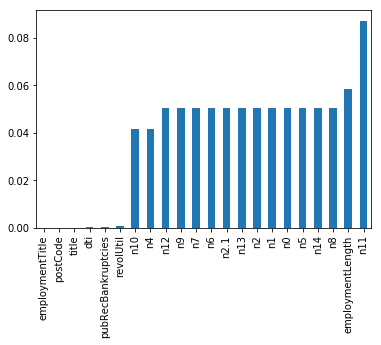

In [19]:
# nan可视化
missing = data_train.isnull().sum()/len(data_train)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

纵向了解哪些列存在 “nan”, 并可以把nan的个数打印，主要的目的在于查看某一列nan存在的个数是否真的很大，如果nan存在的过多，说明这一列对label的影响几乎不起作用了，可以考虑删掉。如果缺失值很小一般可以选择填充。
另外可以横向比较，如果在数据集中，某些样本数据的大部分列都是缺失的且样本足够的情况下可以考虑删除。

查看训练集测试集中特征属性只有一值的特征

In [20]:
one_value_fea = [col for col in data_train.columns if data_train[col].nunique() <= 1]
one_value_fea

['policyCode']

In [21]:
one_value_fea_test = [col for col in data_test_a.columns if data_test_a[col].nunique() <= 1]
one_value_fea_test

['policyCode']

# 总结：
47列数据中有22列都缺少数据，这在现实世界中很正常。‘policyCode’具有一个唯一值（或全部缺失）。有很多连续变量和一些分类变量。

# 2.3.5 查看特征的数值类型有哪些，对象类型有哪些

特征一般都是由类别型特征和数值型特征组成，而数值型特征又分为连续型和离散型。

类别型特征有时具有非数值关系，有时也具有数值关系。比如‘grade’中的等级A，B，C等，是否只是单纯的分类，还是A优于其他要结合业务判断。

数值型特征本是可以直接入模的，但往往风控人员要对其做分箱，转化为WOE编码进而做标准评分卡等操作。

从模型效果上来看，特征分箱主要是为了降低变量的复杂性，减少变量噪音对模型的影响，提高自变量和因变量的相关度。从而使模型更加稳定。

In [22]:
numerical_fea = list(data_train.select_dtypes(exclude=['object']).columns)
category_fea = list(filter(lambda x: x not in numerical_fea,list(data_train.columns)))

In [23]:
numerical_fea

['id',
 'loanAmnt',
 'term',
 'interestRate',
 'installment',
 'employmentTitle',
 'homeOwnership',
 'annualIncome',
 'verificationStatus',
 'isDefault',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'initialListStatus',
 'applicationType',
 'title',
 'policyCode',
 'n0',
 'n1',
 'n2',
 'n2.1',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14']

In [24]:
category_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [25]:
data_train.grade

0         E
1         D
2         D
3         A
4         C
         ..
799995    C
799996    A
799997    C
799998    A
799999    B
Name: grade, Length: 800000, dtype: object

# 数值型变量分析，数值型肯定是包括连续型变量和离散型变量的，找出来
划分数值型变量中的连续变量和离散型变量

In [26]:
#过滤数值型类别特征
def get_numerical_serial_fea(data,feas):
    numerical_serial_fea = []
    numerical_noserial_fea = []
    for fea in feas:
        temp = data[fea].nunique()
        if temp <= 10:
            numerical_noserial_fea.append(fea)
            continue
        numerical_serial_fea.append(fea)
    return numerical_serial_fea,numerical_noserial_fea
numerical_serial_fea,numerical_noserial_fea = get_numerical_serial_fea(data_train,numerical_fea)

In [27]:
numerical_serial_fea

['id',
 'loanAmnt',
 'interestRate',
 'installment',
 'employmentTitle',
 'annualIncome',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'title',
 'n0',
 'n1',
 'n2',
 'n2.1',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n13',
 'n14']

In [28]:
numerical_noserial_fea

['term',
 'homeOwnership',
 'verificationStatus',
 'isDefault',
 'initialListStatus',
 'applicationType',
 'policyCode',
 'n11',
 'n12']

数值类别型变量分析

In [29]:
data_train['term'].value_counts()#离散型变量

3    606902
5    193098
Name: term, dtype: int64

In [30]:
data_train['homeOwnership'].value_counts()#离散型变量

0    395732
1    317660
2     86309
3       185
5        81
4        33
Name: homeOwnership, dtype: int64

In [31]:
data_train['verificationStatus'].value_counts()#离散型变量

1    309810
2    248968
0    241222
Name: verificationStatus, dtype: int64

In [32]:
data_train['initialListStatus'].value_counts()#离散型变量

0    466438
1    333562
Name: initialListStatus, dtype: int64

In [33]:
data_train['applicationType'].value_counts()#离散型变量

0    784586
1     15414
Name: applicationType, dtype: int64

In [34]:
data_train['policyCode'].value_counts()#离散型变量，无用，全部一个值

1.0    800000
Name: policyCode, dtype: int64

In [35]:
data_train['n11'].value_counts()#离散型变量，相差悬殊，用不用再分析

0.0    729682
1.0       540
2.0        24
4.0         1
3.0         1
Name: n11, dtype: int64

In [36]:
data_train['n12'].value_counts()#离散型变量，相差悬殊，用不用再分析

0.0    757315
1.0      2281
2.0       115
3.0        16
4.0         3
Name: n12, dtype: int64

数值连续型变量分析

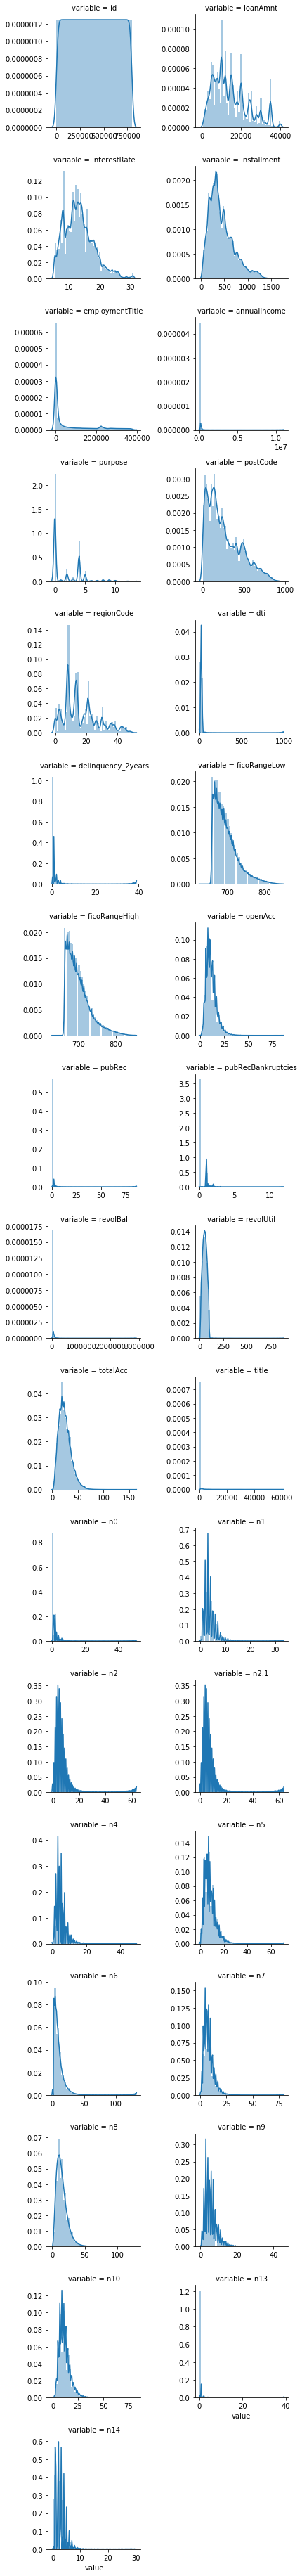

In [37]:
#每个数字特征得分布可视化
f = pd.melt(data_train, value_vars=numerical_serial_fea)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

查看某一个数值型变量的分布，查看变量是否符合正态分布，如果不符合正太分布的变量可以log化后再观察下是否符合正态分布。

如果想统一处理一批数据变标准化 必须把这些之前已经正态化的数据提出

正态化的原因：一些情况下正态非正态可以让模型更快的收敛，一些模型要求数据正态（eg. GMM、KNN）,保证数据不要过偏态即可，过于偏态可能会影响模型预测结果。

Text(0, 0.5, 'Probability')

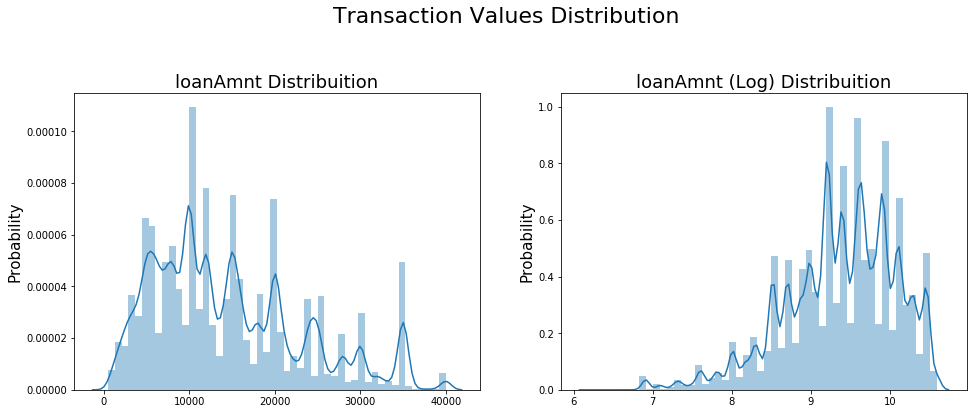

In [41]:
#Ploting Transaction Amount Values Distribution
plt.figure(figsize=(16,12))
plt.suptitle('Transaction Values Distribution', fontsize=22)
plt.subplot(221)
sub_plot_1 = sns.distplot(data_train['loanAmnt'])
sub_plot_1.set_title("loanAmnt Distribuition", fontsize=18)
sub_plot_1.set_xlabel("")
sub_plot_1.set_ylabel("Probability", fontsize=15)

plt.subplot(222)
sub_plot_2 = sns.distplot(np.log(data_train['loanAmnt']))
sub_plot_2.set_title("loanAmnt (Log) Distribuition", fontsize=18)
sub_plot_2.set_xlabel("")
sub_plot_2.set_ylabel("Probability", fontsize=15)

In [42]:
category_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [43]:
data_train['grade'].value_counts()

B    233690
C    227118
A    139661
D    119453
E     55661
F     19053
G      5364
Name: grade, dtype: int64

In [44]:
data_train['subGrade'].value_counts()

C1    50763
B4    49516
B5    48965
B3    48600
C2    47068
C3    44751
C4    44272
B2    44227
B1    42382
C5    40264
A5    38045
A4    30928
D1    30538
D2    26528
A1    25909
D3    23410
A3    22655
A2    22124
D4    21139
D5    17838
E1    14064
E2    12746
E3    10925
E4     9273
E5     8653
F1     5925
F2     4340
F3     3577
F4     2859
F5     2352
G1     1759
G2     1231
G3      978
G4      751
G5      645
Name: subGrade, dtype: int64

In [45]:
data_train['employmentLength'].value_counts()

10+ years    262753
2 years       72358
< 1 year      64237
3 years       64152
1 year        52489
5 years       50102
4 years       47985
6 years       37254
8 years       36192
7 years       35407
9 years       30272
Name: employmentLength, dtype: int64

In [46]:
data_train['issueDate'].value_counts()

2016-03-01    29066
2015-10-01    25525
2015-07-01    24496
2015-12-01    23245
2014-10-01    21461
2016-02-01    20571
2015-11-01    19453
2015-01-01    19254
2015-04-01    18929
2015-08-01    18750
2015-05-01    17119
2016-01-01    16792
2014-07-01    16355
2015-06-01    15236
2015-09-01    14950
2016-04-01    14248
2014-11-01    13793
2015-03-01    13549
2016-08-01    13301
2015-02-01    12881
2016-07-01    12835
2016-06-01    12270
2016-12-01    11562
2016-10-01    11245
2016-11-01    11172
2014-05-01    10886
2014-04-01    10830
2016-05-01    10680
2014-08-01    10648
2016-09-01    10165
2017-03-01    10068
2017-01-01     9757
2014-06-01     9665
2014-03-01     9645
2017-05-01     9620
2014-01-01     9273
2017-08-01     9172
2014-02-01     9105
2017-06-01     9005
2013-12-01     8948
2017-07-01     8861
2013-11-01     8748
2013-10-01     8409
2017-09-01     8100
2017-02-01     8057
2017-04-01     7746
2013-09-01     7733
2013-08-01     7490
2017-11-01     7306
2017-10-01     7129


In [47]:
data_train['earliesCreditLine'].value_counts()

Aug-2001    5567
Sep-2003    5403
Aug-2002    5403
Oct-2001    5258
Aug-2000    5246
            ... 
Oct-1957       1
Jan-1946       1
Mar-1957       1
Aug-1946       1
Jan-1944       1
Name: earliesCreditLine, Length: 720, dtype: int64

In [48]:
data_train['isDefault'].value_counts()

0    640390
1    159610
Name: isDefault, dtype: int64

# 总结：
上面我们用value_counts()等函数看了特征属性的分布，但是图表是概括原始信息最便捷的方式。
数无形时少直觉。
同一份数据集，在不同的尺度刻画上显示出来的图形反映的规律是不一样的。python将数据转化成图表，但结论是否正确需要由你保证。

# 2.3.6 变量分布可视化
单一变量分布可视化

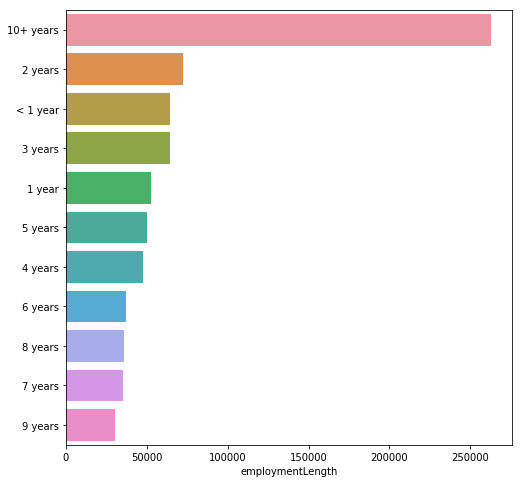

In [49]:
plt.figure(figsize=(8, 8))
sns.barplot(data_train["employmentLength"].value_counts(dropna=False)[:20],
            data_train["employmentLength"].value_counts(dropna=False).keys()[:20])
plt.show()

# 根绝y值不同可视化x某个特征的分布
首先查看类别型变量在不同y值上的分布

In [50]:
train_loan_fr = data_train.loc[data_train['isDefault'] == 1]
train_loan_nofr = data_train.loc[data_train['isDefault'] == 0]

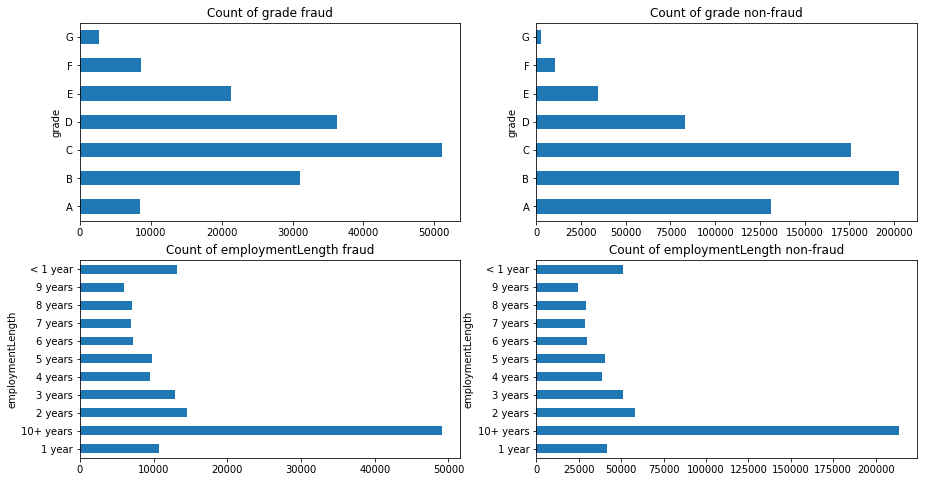

In [51]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8))
train_loan_fr.groupby('grade')['grade'].count().plot(kind='barh', ax=ax1, title='Count of grade fraud')
train_loan_nofr.groupby('grade')['grade'].count().plot(kind='barh', ax=ax2, title='Count of grade non-fraud')
train_loan_fr.groupby('employmentLength')['employmentLength'].count().plot(kind='barh', ax=ax3, title='Count of employmentLength fraud')
train_loan_nofr.groupby('employmentLength')['employmentLength'].count().plot(kind='barh', ax=ax4, title='Count of employmentLength non-fraud')
plt.show()

# 其次查看连续型变量在不同y值上的分布

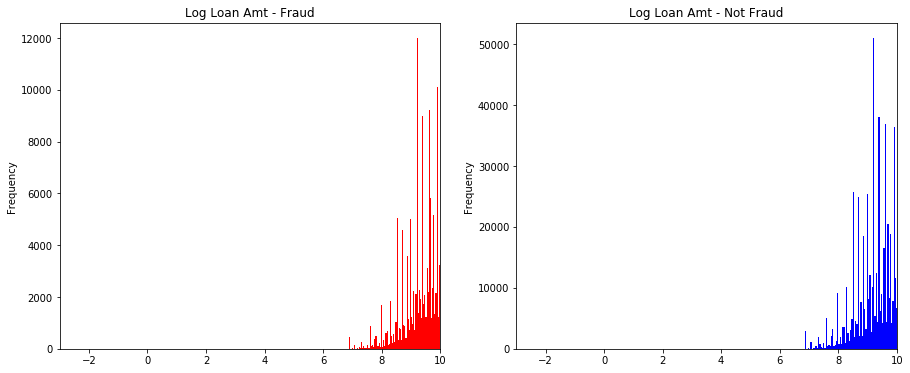

In [53]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 6))
data_train.loc[data_train['isDefault'] == 1] \
    ['loanAmnt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Loan Amt - Fraud',
          color='r',
          xlim=(-3, 10),
         ax= ax1)
data_train.loc[data_train['isDefault'] == 0] \
    ['loanAmnt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Loan Amt - Not Fraud',
          color='b',
          xlim=(-3, 10),
         ax=ax2)

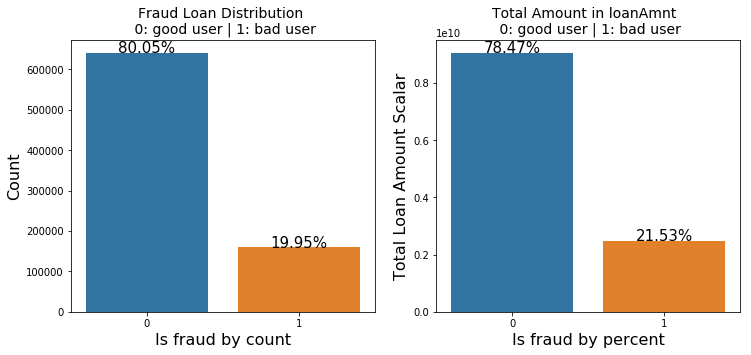

In [54]:
total = len(data_train)
total_amt = data_train.groupby(['isDefault'])['loanAmnt'].sum().sum()
plt.figure(figsize=(12,5))
plt.subplot(121)##1代表行，2代表列，所以一共有2个图，1代表此时绘制第一个图。
plot_tr = sns.countplot(x='isDefault',data=data_train)#data_train‘isDefault’这个特征每种类别的数量**
plot_tr.set_title("Fraud Loan Distribution \n 0: good user | 1: bad user", fontsize=14)
plot_tr.set_xlabel("Is fraud by count", fontsize=16)
plot_tr.set_ylabel('Count', fontsize=16)
for p in plot_tr.patches:
    height = p.get_height()
    plot_tr.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 
    
percent_amt = (data_train.groupby(['isDefault'])['loanAmnt'].sum())
percent_amt = percent_amt.reset_index()
plt.subplot(122)
plot_tr_2 = sns.barplot(x='isDefault', y='loanAmnt',  dodge=True, data=percent_amt)
plot_tr_2.set_title("Total Amount in loanAmnt  \n 0: good user | 1: bad user", fontsize=14)
plot_tr_2.set_xlabel("Is fraud by percent", fontsize=16)
plot_tr_2.set_ylabel('Total Loan Amount Scalar', fontsize=16)
for p in plot_tr_2.patches:
    height = p.get_height()
    plot_tr_2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_amt * 100),
            ha="center", fontsize=15) 

# 2.3.6 时间格式数据处理及查看

In [55]:
#转化成时间格式  issueDateDT特征表示数据日期离数据集中日期最早的日期（2007-06-01）的天数
data_train['issueDate'] = pd.to_datetime(data_train['issueDate'],format='%Y-%m-%d')
startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
data_train['issueDateDT'] = data_train['issueDate'].apply(lambda x: x-startdate).dt.days

In [56]:
#转化成时间格式
data_test_a['issueDate'] = pd.to_datetime(data_train['issueDate'],format='%Y-%m-%d')
startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
data_test_a['issueDateDT'] = data_test_a['issueDate'].apply(lambda x: x-startdate).dt.days

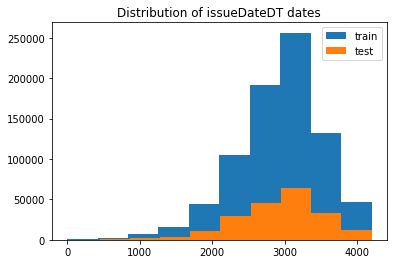

In [57]:
plt.hist(data_train['issueDateDT'], label='train');
plt.hist(data_test_a['issueDateDT'], label='test');
plt.legend();
plt.title('Distribution of issueDateDT dates');
#train 和 test issueDateDT 日期有重叠 所以使用基于时间的分割进行验证是不明智的

# 2.3.7 掌握透视图可以让我们更好的了解数据

In [58]:
#透视图 索引可以有多个，“columns（列）”是可选的，聚合函数aggfunc最后是被应用到了变量“values”中你所列举的项目上。
pivot = pd.pivot_table(data_train, index=['grade'], columns=['issueDateDT'], values=['loanAmnt'], aggfunc=np.sum)
pivot

loanAmnt                                                         \
issueDateDT     0        30       61       92       122      153       183    
grade                                                                         
A                NaN  53650.0  42000.0  19500.0  34425.0  63950.0   43500.0   
B                NaN  13000.0  24000.0  32125.0   7025.0  95750.0  164300.0   
C                NaN  68750.0   8175.0  10000.0  61800.0  52550.0  175375.0   
D                NaN      NaN   5500.0   2850.0  28625.0      NaN  167975.0   
E             7500.0      NaN  10000.0      NaN  17975.0   1500.0   94375.0   
F                NaN      NaN  31250.0   2125.0      NaN      NaN       NaN   
G                NaN      NaN      NaN      NaN      NaN      NaN       NaN   

                                                                       \
issueDateDT      214       245       274       305      335      366    
grade                                                                   
A            168825.0   85600.0  101825.0   99175.0  64700.0  16300.0   
B            303175.0  434425.0  538450.0  364700.0  52300.0  69550.0   
C            151100.0  243725.0  393150.0  240550.0  54800.0  77650.0   
D            171325.0  192900.0  269325.0  113100.0  37500.0  22500.0   
E            116450.0   42000.0  139775.0   43575.0  23500.0      NaN   
F             49000.0   27000.0   43000.0   20000.0      NaN      NaN   
G             24625.0       NaN       NaN       NaN      NaN      NaN   

                                                                       \
issueDateDT      396      427      458       488       519       549    
grade                                                                   
A             64500.0  35000.0  40100.0   67850.0  105000.0  228375.0   
B            110600.0  57500.0  22200.0  155875.0  487275.0  470875.0   
C            117800.0  72400.0  45500.0  158850.0  180850.0  445850.0   
D             40500.0  34600.0      NaN   80100.0  193875.0  149250.0   
E              8500.0   7500.0      NaN   39000.0  109000.0   72750.0   
F                 NaN  10500.0   4250.0       NaN       NaN   21000.0   
G                 NaN      NaN      NaN       NaN       NaN       NaN   

                                                                         \
issueDateDT      580       611       639       670       700       731    
grade                                                                     
A            284900.0  286650.0  315200.0  359775.0  333300.0  328400.0   
B            374450.0  138600.0  130700.0  240800.0  757150.0  687000.0   
C            347850.0  516425.0  596900.0  375150.0  472900.0  442400.0   
D            270525.0  306375.0  346025.0  338000.0  150400.0  153900.0   
E             52250.0  188650.0  125500.0  139500.0  157450.0   50400.0   
F             14000.0   20000.0   18000.0   49200.0   55600.0   15000.0   
G                 NaN       NaN       NaN       NaN       NaN   14600.0   

                                                                             \
issueDateDT      761       792        823        853        884        914    
grade                                                                         
A            435650.0  430575.0   540350.0   403200.0   612075.0   620425.0   
B            690325.0  828175.0  1025575.0  1054125.0  1128625.0  1729950.0   
C            541050.0  525100.0   776550.0   849625.0   844250.0   903200.0   
D            187475.0  177975.0   257750.0   551425.0   870700.0   514650.0   
E            104700.0  164200.0   266375.0   264200.0   245500.0   129400.0   
F             92800.0   40175.0    48000.0    52650.0    64500.0    40000.0   
G             50000.0    7750.0     5000.0    15000.0    44750.0    31500.0   

                                                                               \
issueDateDT       945        976        1004       1035       1065       1096   
grade                                                  

# 2.3.8 用pandas_profiling生成数据报告

In [61]:
import pandas_profiling

In [65]:
pfr = pandas_profiling.ProfileReport(data_train)
# pfr.to_file("result/example.html")